In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch import nn
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor




print(torch.__version__)
print(torchvision.__version__)

2.6.0+cu124
0.21.0+cu124


In [2]:
! nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [3]:
from torchvision import datasets


train_data = datasets.FashionMNIST(
    root = "data",
    train = True,
    download=True,
    transform = torchvision.transforms.ToTensor(),
    target_transform = None
)

test_data = datasets.FashionMNIST(
    root = "data",
    train = False,
    download=False,
    transform = ToTensor(),
    target_transform = None
)

100%|██████████| 26.4M/26.4M [00:03<00:00, 8.01MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 136kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 2.49MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 9.28MB/s]


In [4]:
len(train_data), len(test_data)

(60000, 10000)

In [5]:
classes_names = train_data.classes
classes_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
train_data.class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [7]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [8]:
image, label = train_data[0]

In [9]:
image.shape, label

(torch.Size([1, 28, 28]), 9)

In [10]:
# check the shape of image

print(f"Image shape : {image.shape} -> [color_channel, height, width]")

Image shape : torch.Size([1, 28, 28]) -> [color_channel, height, width]


In [11]:
img = image.squeeze()
img.shape

torch.Size([28, 28])

In [12]:
# image_ny = img.cpu().numpy()

torch.Size([28, 28])


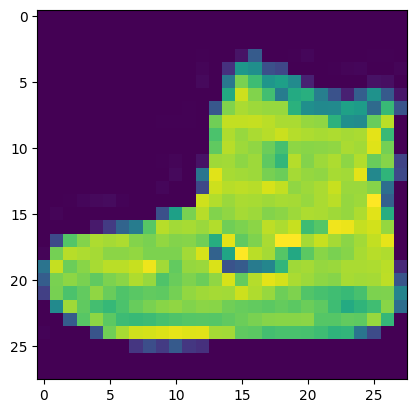

In [13]:
print(image.squeeze().shape)
plt.imshow(img);

(-0.5, 27.5, 27.5, -0.5)

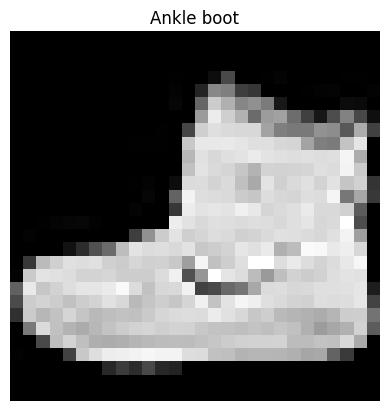

In [14]:
plt.imshow(image.squeeze(), cmap='gray')
plt.title(classes_names[label]);
plt.axis(False)

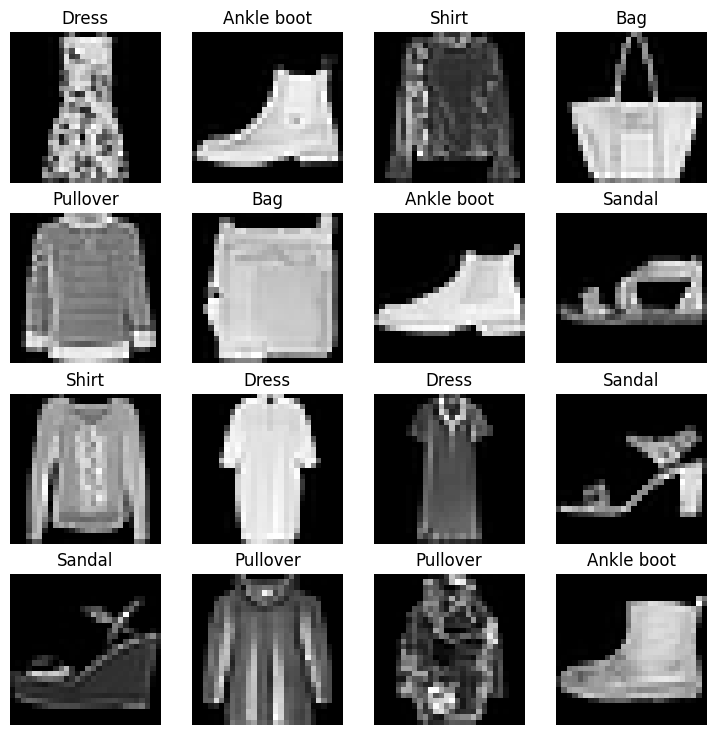

In [15]:
# plot more images

# torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(train_data), size =[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.axis(False)
    plt.title(classes_names[label])
    plt.imshow(img.squeeze(), cmap='gray')



In [16]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [17]:
from torch.utils.data import DataLoader


# setup the bacth size hyperparameter


BATCH_SIZE = 32

# Trun datasets into iterbales(batches)

train_dataloader = DataLoader(dataset=train_data,
                             batch_size=BATCH_SIZE,
                             shuffle=True)
test_dataloader = DataLoader(dataset = test_data,
                            batch_size=BATCH_SIZE,
                            shuffle= False)


train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7ba17f215e50>,
 <torch.utils.data.dataloader.DataLoader at 0x7ba17f4e2190>)

In [18]:
len(train_dataloader), len(test_dataloader)

(1875, 313)

In [19]:
train_features_batch, train_label_batch = next(iter(train_dataloader))

train_features_batch.shape 

torch.Size([32, 1, 28, 28])

Image size : torch.Size([1, 28, 28])
 label : 3, label size : torch.Size([])


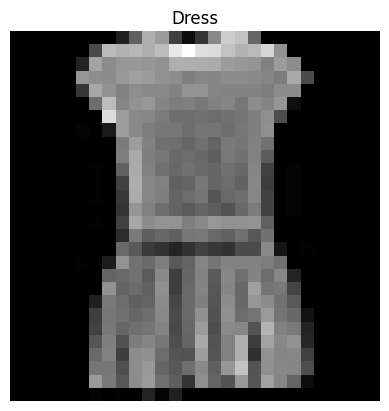

In [20]:
# torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_label_batch[random_idx]
plt.imshow(img.squeeze(),cmap='gray')
plt.title(classes_names[label])
plt.axis(False)
print(f"Image size : {img.shape}")
print(f" label : {label}, label size : {label.shape}")

In [21]:
# create a flatten layer

flatten_model = nn.Flatten()

x = train_features_batch[0]


output = flatten_model(x)

print(f"without flatten:  {x.shape}  -> [color_channel, height, weight]")
print(f"with flatten :  {output.shape}  -> [color_channel, height * weight]")

without flatten:  torch.Size([1, 28, 28])  -> [color_channel, height, weight]
with flatten :  torch.Size([1, 784])  -> [color_channel, height * weight]


In [22]:
class Fashion_model(nn.Module):
    def __init__(self, input_shape:int, hidden:int, output_shape:int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden),
            nn.Linear(in_features=hidden, out_features=output_shape))

    def forward(self,x):
        return self.layer_stack(x)
    

In [23]:
torch.manual_seed(42)

model = Fashion_model(input_shape=784, hidden=10, output_shape=len(classes_names)).to("cpu")
model

Fashion_model(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [24]:
dummy_x = torch.rand([1, 1, 28 ,28])
model(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

## setup Loss, Optimizer and Evaluation

* Loss function - since were's working with multi-class out loss function will be `nn.CrossEntropyLoss()`.
* Optimizer-our optimizer `torch.optim.SGD()` --> Stochastic gradient descet.
* Evaluation metric 

In [25]:
import requests
from pathlib import Path

# Download helper function from learn pytorch repo
if Path("helper_function.py").is_file():
    print("files is there")
else:
    print("download the fils")

request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
with open("helper_function.py", "wb") as f:
    f.write(request.content)
    

download the fils


In [26]:
from helper_function import accuracy_fn

# Setup loss function and optimizer

loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params=model.parameters(), lr=0.1)



## Create a function to time our experiments

Machine learning is very experimental.

Two of the main things you'll often want to track are:

    1.Model's performance(loss and accuracy values etc)
    2.How fast it runs

In [27]:
from timeit import default_timer as timer

def print_train_time(start:float,end:float, device:torch.device=None):

    total_time = end - start
    print(f"Train time of {device}:{total_time:.3f} seconds")
    return total_time

In [28]:
start_time = timer()

## some code....

end_time = timer()
print_train_time(start=start_time, end = end_time, device="cpu")

Train time of cpu:0.000 seconds


3.150000003415698e-05

In [37]:
from tqdm.auto import tqdm


torch.manual_seed(42)

train_time_start_on_cpu = timer()


epochs = 3


# create train and test loop

for epoch in tqdm(range(epochs)):
    print(f"epoch : {epochs} \n___...")

    # train loss
    train_loss = 0

    # add a loop to loop through the training batchs

    for batch, (x, y) in enumerate(train_dataloader):

        model.train()

        # 1.forward  in pass
        y_pred = model(x)

        # 2.calculate the loss

        loss = loss_fn(y_pred, y)
        train_loss += loss

        # 3.optimizer.zero_grad()

        optimizer.zero_grad()

        # 4.lossbackward

        loss.backward()

        # 5.optimizer.steps

        optimizer.step()

        if batch % 400 == 0:
            print(f"Looked at {batch * len(x)}/{len(train_dataloader.dataset)} samples")

        # evalute the total loss by lenght of train_dataloader

    train_loss /= len(train_dataloader)

        # testing 

    test_loss , test_acc = 0, 0

    model.eval()
    with torch.inference_mode():
        for x_test, y_test in test_dataloader:
            # forward_pass
            
            test_pred = model(x)

            # calculate the loss

            test_loss += loss_fn(test_pred, y)

            # calculate the accuracy

            test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))

            # calculate the test losss

        test_loss /= len(test_data)

            # calculate the accuracy

        test_acc /= len(test_dataloader)

            # print out what's happend

    print(f"\ntrain loss : {train_loss:.4f} | test loss : {test_loss:.4f} | test_acc : {test_acc:.4f}")

                # calculate the trainin time

train_time_end_on_cpu = timer()
total_train_time_model = print_train_time(start=train_time_start_on_cpu,
                                         end=train_time_end_on_cpu,
                                         device=str(next(model.parameters()).device))
                

        

    

  0%|          | 0/3 [00:00<?, ?it/s]

epoch : 3 
___...
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

train loss : 0.4242 | test loss : 0.0092 | test_acc : 87.5000
epoch : 3 
___...
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

train loss : 0.4207 | test loss : 0.0090 | test_acc : 87.5000
epoch : 3 
___...
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

train loss : 0.4177 | test loss : 0.0088 | test_acc : 84.3750
Train time of cpu:21.555 seconds
